In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.utils import plot_model
from numpy import unique, argmax

In [2]:
# Loading Dataset

(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

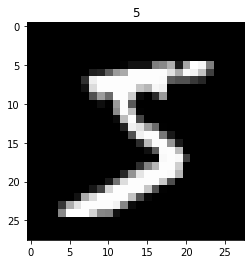

In [3]:
# Visualisation before normalisation of data

plt.imshow(x_train[0],cmap='gray')
plt.title(y_train[0])
plt.show()
    

In [4]:
# Reshaping Training and Testing data

x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2],1))

x_train.shape, x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [5]:
# Normalization of the image pixal
x_train = x_train.astype('float32')/255.0
x_test = x_test.astype('float32')/255.0

In [6]:
# Defining of Model

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape = x_train.shape[1:]))
model.add(MaxPool2D((2,2))) 
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [7]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

In [8]:
# Compiling the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
x= model.fit(x_train, y_train, epochs=10, batch_size=128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 52s - loss: 0.3228 - accuracy: 0.9071 - val_loss: 0.0861 - val_accuracy: 0.9748 - 52s/epoch - 123ms/step
Epoch 2/10
422/422 - 38s - loss: 0.0911 - accuracy: 0.9719 - val_loss: 0.0550 - val_accuracy: 0.9842 - 38s/epoch - 89ms/step
Epoch 3/10
422/422 - 38s - loss: 0.0671 - accuracy: 0.9794 - val_loss: 0.0418 - val_accuracy: 0.9890 - 38s/epoch - 90ms/step
Epoch 4/10
422/422 - 38s - loss: 0.0548 - accuracy: 0.9827 - val_loss: 0.0414 - val_accuracy: 0.9890 - 38s/epoch - 89ms/step
Epoch 5/10
422/422 - 38s - loss: 0.0479 - accuracy: 0.9852 - val_loss: 0.0412 - val_accuracy: 0.9890 - 38s/epoch - 91ms/step
Epoch 6/10
422/422 - 39s - loss: 0.0425 - accuracy: 0.9865 - val_loss: 0.0350 - val_accuracy: 0.9900 - 39s/epoch - 92ms/step
Epoch 7/10
422/422 - 38s - loss: 0.0388 - accuracy: 0.9874 - val_loss: 0.0354 - val_accuracy: 0.9895 - 38s/epoch - 89ms/step
Epoch 8/10
422/422 - 38s - loss: 0.0341 - accuracy: 0.9894 - val_loss: 0.0367 - val_accuracy: 0.9900 - 38s/epoch - 90ms/step

In [13]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 98.9799976348877


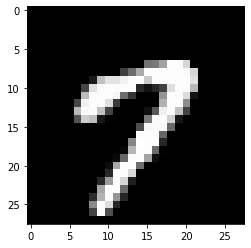

In [12]:
# Example
image = x_train[15]
plt.imshow(np.squeeze(image), cmap='gray')
plt.show()

In [14]:
image = image.reshape(1, image.shape[0], image.shape[1], image.shape[2])
p = model.predict([image])
print('Predicted: {}'.format(argmax(p)))

1/1 [==============================] - 0s 89ms/step
Predicted: 7
